In [164]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time;  from datetime import datetime
import math
plt.rcParams["figure.figsize"] = (15,10)

In [165]:
desklet = pd.read_csv('desklet_bid_adjustments.csv') # read the desklet
summary = desklet.tail(2) # store summary rows separately
desklet = desklet.drop([327,328]) # drop summary columns rows
orig_desklet=pd.read_csv('desklet_bid_adjustments.csv') # read the desklet

In [166]:
desklet.rename(columns={'Avg. CPC':'avg_cpc($)'}, inplace=True)
desklet.rename(columns={'Cost / conv.':'cost_per_conv($)'}, inplace=True)
desklet.rename(columns={'Conv. rate':'conversion_rate(%)'}, inplace=True)
desklet.rename(columns={'Avg. CPC':'avg_cpc($)'}, inplace=True)
desklet.rename(columns={'Cost':'Cost($)'}, inplace=True)
desklet.rename(columns={'CTR':'CTR(%)'}, inplace=True)
desklet.rename(columns={'Conv. value':'Conv. value($)'}, inplace=True)
desklet.rename(columns={'Bid adj.':"Bid adj.(%)"}, inplace=True)

In [167]:
### CONVERT DATA INTO FLOATS FOR GRAPHING


# convert dollar amounts into floats for processing

def convert_dollar_float(row):
    try:
        return float(str(row)[1:])
    except:
        return float(str(row)[1:].replace(',', ''))
    
desklet['Cost($)'] = desklet['Cost($)'].apply(convert_dollar_float)
desklet['avg_cpc($)'] = desklet['avg_cpc($)'].apply(convert_dollar_float)
desklet['cost_per_conv($)'] = desklet['cost_per_conv($)'].apply(convert_dollar_float)

# convert percentages into floats for processing

def convert_percentage_float(row):
    return float(str(row)[:-1])
    
desklet['conversion_rate(%)'] = desklet['conversion_rate(%)'].apply(convert_percentage_float)    
desklet['CTR(%)'] = desklet['CTR(%)'].apply(convert_percentage_float)    
desklet['Bid adj.(%)']=desklet['Bid adj.(%)'].apply(convert_percentage_float)

# convert strings with commas into floats

def change_comma_values_to_float(row):
    row = str(row).replace(',', '')
    return float(row)

def change_str_float(row):
    try:
        row = str(row).replace(',', '')
        return float(row)
    except:
        return np.NaN
    
desklet.Conversions=desklet.Conversions.apply(change_comma_values_to_float)
desklet['Conv. value($)']=desklet['Conv. value($)'].apply(change_comma_values_to_float)
desklet['Avg. pos.']=desklet['Avg. pos.'].apply(change_str_float)
desklet['Clicks']=desklet['Clicks'].apply(change_str_float)
desklet['Impr.']=desklet['Impr.'].apply(change_str_float)


# convert bid adjustment to float
def strip_first_last(row):
    try:
        row  = (str(row)[1:-1])
        return float(row)
    except:
        return 0



In [169]:
desklet.describe()

Bid adj.(%)        Clicks          Impr.      CTR(%)  avg_cpc($)  \
count   327.000000    327.000000     327.000000  327.000000  327.000000   
mean     44.816514    704.623853   12095.018349    5.847156    0.628043   
std      74.410546   1905.823791   32144.422181    1.647591    0.273261   
min     -60.000000      0.000000       0.000000    0.000000    0.000000   
25%       0.000000     46.500000     745.000000    5.145000    0.485000   
50%      30.000000    110.000000    1804.000000    5.870000    0.600000   
75%      60.000000    367.500000    6363.500000    6.710000    0.720000   
max     200.000000  17559.000000  320109.000000   12.340000    1.460000   

            Cost($)   Avg. pos.  Conversions  cost_per_conv($)  \
count    327.000000  324.000000   327.000000        327.000000   
mean     382.339052    2.619753    15.859327         26.191193   
std     1029.061450    0.358763    46.786538         30.347860   
min        0.000000    1.800000     0.000000          0.000000   
25%       36.030000    2.500000     0.000000          0.000000   
50%       83.510000    2.700000     2.000000         19.840000   
75%      217.245000    2.800000     7.000000         36.960000   
max    10810.040000    3.500000   515.000000        171.010000   

       conversion_rate(%)  Conv. value($)  Conv. value / cost  
count          327.000000      327.000000          327.000000  
mean             2.226850     1581.737706            4.449297  
std              3.030655     4545.781854           11.230588  
min              0.000000        0.000000            0.000000  
25%              0.000000        0.000000            0.000000  
50%              1.440000      187.990000            2.210000  
75%              2.750000      869.625000            4.220000  
max             19.230000    47398.900000          144.130000

In [119]:
### Extract State and city/zip data from Location

# Extract state from location data
def state_from_location(row):
    try:
        row = str(row).split(',')
        return row[-2].strip()
    except:
        return np.nan
desklet['state'] = desklet.Location.apply(state_from_location)

# Extract city or zip from location data
def cityzip_from_location(row):
    try:
        row = str(row).split(',')
        return row[-3].strip()
    except:
        return np.nan
desklet['cityzip'] = desklet.Location.apply(cityzip_from_location)


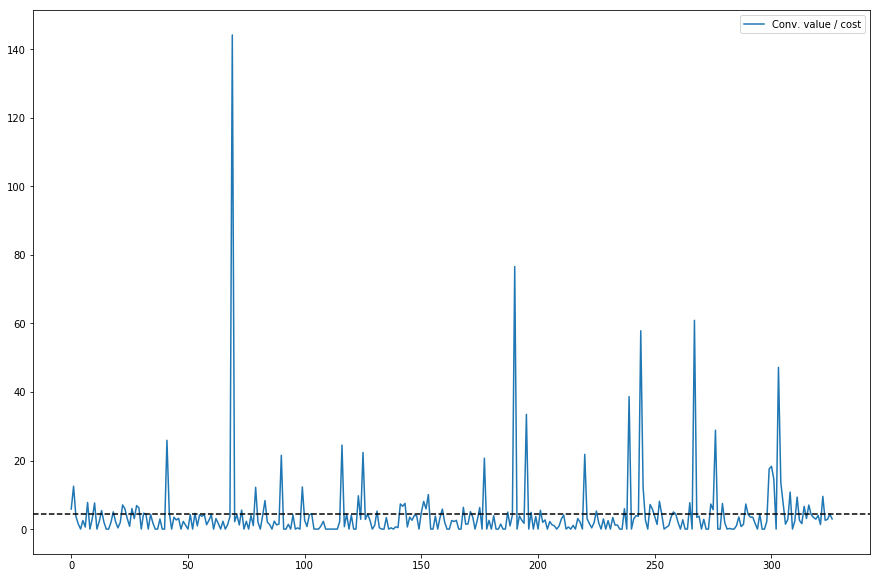

In [121]:
# This is the average revenue in $ per dollar spent on advertising.
# We should try to even out this graph, with ideally everything ~= 1 (thats for marginal though. Hmmmm)
# So press down the bumps with increases in spending, and pull up the troughs by reducing spending.

desklet[["Conv. value / cost"]].plot().\
axhline(y=desklet["Conv. value / cost"].describe().iloc[1], color='black', linestyle='--')

In [ ]:
# TODO

# Find a list of places where this graph is spiking, and graph against number of coversions
# We should try to figure out how many are unique conversions/ as opposed to a returning customers.


In [153]:
desklet[desklet["Conv. value / cost"]>3]

Location  Bid adj.(%)  Clicks  \
0                  Milwaukee, Wisconsin, United States         60.0   482.0   
1                   Plant City, Florida, United States         30.0    57.0   
2                        North Carolina, United States          0.0     NaN   
7                  San Jose, California, United States         30.0   892.0   
9               Ellicott City, Maryland, United States         60.0    95.0   
10                        Conroe, Texas, United States         60.0   150.0   
13                                 Utah, United States          0.0     NaN   
18                        Spring, Texas, United States         15.0   249.0   
22                 Salt Lake City, Utah, United States          0.0   377.0   
23                       Killeen, Texas, United States         60.0   136.0   
24                            Tennessee, United States        -30.0     NaN   
26                     Brandon, Florida, United States         60.0    85.0   
27                             Arkansas, United States        -15.0     NaN   
28                  Baltimore, Maryland, United States         30.0   555.0   
29               New Orleans, Louisiana, United States         45.0   386.0   
31                   New York, New York, United States        -30.0     NaN   
32                  DeRidder, Louisiana, United States         60.0    22.0   
34              Los Angeles, California, United States         30.0     NaN   
41                    92020, California, United States        -50.0    12.0   
42                             New York, United States        -30.0     NaN   
44                         Pennsylvania, United States          0.0     NaN   
46                     Phoenix, Arizona, United States         15.0   895.0   
51                          Connecticut, United States         45.0     NaN   
53                               Nevada, United States        -15.0     NaN   
55             Deerfield Beach, Florida, United States         60.0    58.0   
56               San Rafael, California, United States         60.0    92.0   
57                     Aurora, Illinois, United States         60.0   145.0   
60                             Delaware, United States         30.0   843.0   
62                            Minnesota, United States        -30.0     NaN   
68                    Potomac, Maryland, United States         30.0    98.0   
..                                                 ...          ...     ...   
265                   92677, California, United States        160.0   123.0   
267                    55404, Minnesota, United States        -50.0     9.0   
268                             Vermont, United States         30.0   858.0   
269                 Appleton, Wisconsin, United States         45.0   122.0   
274  Hilton Head Island, South Carolina, United States         60.0    89.0   
275                    Atlanta, Georgia, United States         30.0   994.0   
276                        78660, Texas, United States        160.0   166.0   
279            Breaux Bridge, Louisiana, United States         60.0    13.0   
286                        Rhode Island, United States        -30.0   598.0   
289               Jacksonville, Florida, United States         40.0   904.0   
290          Saratoga Springs, New York, United States         60.0   105.0   
291                             Indiana, United States        -15.0     NaN   
292             Albuquerque, New Mexico, United States          0.0   370.0   
295                    Norman, Oklahoma, United States         60.0   123.0   
299                        North Dakota, United States        -30.0   355.0   
300               Indianapolis, Indiana, United States        -45.0   145.0   
301                    Gilbert, Arizona, United States         60.0   278.0   
303                Nashville, Tennessee, United States        -30.0   193.0   
304                       West Virginia, United States        -15.0   956.0   
305              

In [123]:
# TODO - See if there is a mismatch between adjustment and cost/conv. if there is a positive BA
# but low conversions OR high cost/conversion(?) we should revise downwards

In [124]:
# TODO - Separate state level bids and compare them to agregated bids by city per state. If there is a mismatch,
# Lets say we have a BA of +50% in the state but in the cities and zips we have -50, that doesn't make sense.

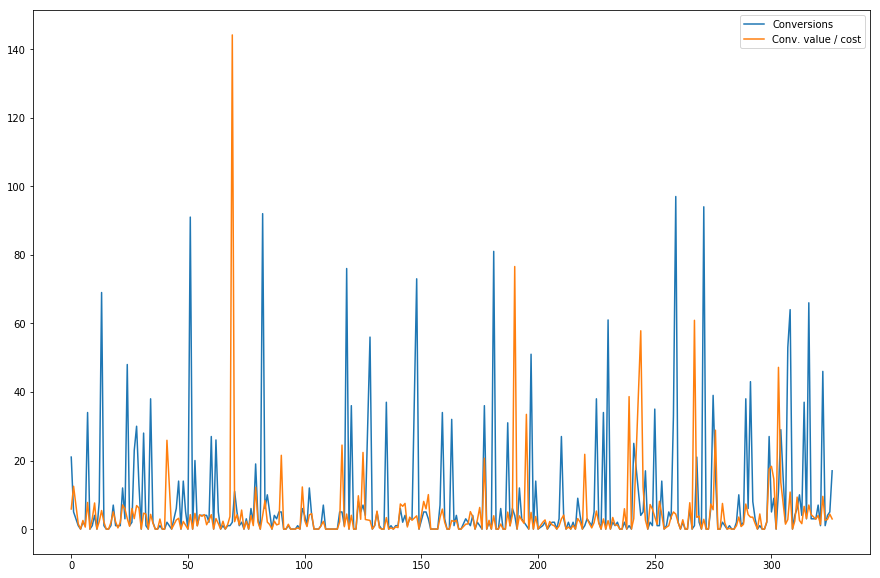

In [114]:
df2 = desklet[desklet['Conversions']<100]
df2[["Conversions","Conv. value / cost"]].plot()

In [115]:
# Sort this by column1
desklet["Conv. value / cost"].value_counts().head()

0.00    96
0.94     4
0.35     3
2.57     3
4.39     3
Name: Conv. value / cost, dtype: int64

In [116]:
# There are a number of records where no conversions happen, and some of them cost a lot of money
# We could turn down the BA on these.
# Is there anything we need to check against for this? 
# The conversion rate here is 0
# Total cost for these ads - once the cost is an int.

cost_where_no_conversion= 0


In [117]:
desklet["Conv. value / cost"].describe().iloc[1]

4.4492966360856272